In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [129]:
df = pd.read_csv('data/Bank_Personal_Loan_Modelling.csv')

In [130]:
 # This dataset have 5000 row and 14 columns and personal Loan is target. other features are:
 # id : Customer ID
 # age : Customer's age in completed years
 # experience : years of professional experience
 # income : Annual income of the customer
 # zip_code : Home Address ZIP code.
 # family : Family size of the customer
 # ccavg : Avg. spending on credit cards per month
 # education : Education Level.
 # Undergrad
 # Graduate
 # Advanced/Professional
 # mortgage : Value of house mortgage if any.
 # personal_loan : Did this customer accept the personal loan offered in the last campaign?
 # securities_account : Does the customer have a securities account with the bank?
 # cd_account : Does the customer have a certificate of deposit (CD) account with the bank?
 # online : Does the customer use internet banking facilities?
 # creditcard : D

In [131]:
target = "Personal Loan"

In [132]:
def detect_problem_type(df, target_column, class_threshold=10):
    """
    Verilen DataFrame'de hedef sütuna göre problem tipi belirler: 'classification' veya 'regression'.

    Parameters:
    - df: pandas DataFrame
    - target_column: Hedef (label) sütununun adı (str)
    - class_threshold: Sınıf sayısı bu sayıdan küçükse sınıflandırma varsayılır

    Returns:
    - "classification" veya "regression"
    """
    target = df[target_column]

    # Eğer veri tipi object, category, bool -> sınıflandırma
    if target.dtype == 'object' or target.dtype.name == 'category' or target.dtype == 'bool':
        return "classification"

    # Sayısal ama az sayıda unique değer varsa sınıflandırma
    unique_values = target.nunique()
    if unique_values <= class_threshold:
        return "classification"

    # Aksi takdirde regresyon
    return "regression"

In [133]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [134]:
problem_type = detect_problem_type(df, target_column=target)
print("Problem tipi:", problem_type)

Problem tipi: classification


In [135]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [137]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [138]:
df.Mortgage.value_counts()

Mortgage
0      3462
98       17
119      16
89       16
91       16
       ... 
547       1
458       1
505       1
361       1
541       1
Name: count, Length: 347, dtype: int64

In [139]:
df.CreditCard.value_counts()

CreditCard
0    3530
1    1470
Name: count, dtype: int64

In [140]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [141]:
def is_classification(y):
    return y.dtype == 'object' or y.nunique() < 15 and y.dtype in [np.int64, np.bool_]

In [142]:
df_model = df.drop(columns=["ID", "ZIP Code"])

X = df_model.drop(target, axis=1)
y = df_model[target]

In [143]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [144]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [145]:
print(is_classification(y))

True


In [146]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)



RandomForestClassifier(random_state=42)

In [147]:
y_pred = model.predict(X_test_scaled)

In [149]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.992
[[902   2]
 [  6  90]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       904
           1       0.98      0.94      0.96        96

    accuracy                           0.99      1000
   macro avg       0.99      0.97      0.98      1000
weighted avg       0.99      0.99      0.99      1000



In [150]:
df["Personal Loan"].value_counts()

Personal Loan
0    4520
1     480
Name: count, dtype: int64

In [168]:
df_model.corr()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,0.994215,-0.055269,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,0.994215,1.000000,-0.046574,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.055269,-0.046574,1.000000,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
Family,-0.046418,-0.052563,-0.157501,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.052012,-0.050077,0.645984,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.041334,0.013152,-0.187524,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,-0.010582,0.206806,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.007726,-0.007413,0.502462,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,-0.000436,-0.001232,-0.002616,0.019994,0.015086,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028
CD Account,0.008043,0.010353,0.169738,0.014110,0.136534,0.013934,0.089311,0.316355,0.317034,1.000000,0.175880,0.278644


<Axes: >

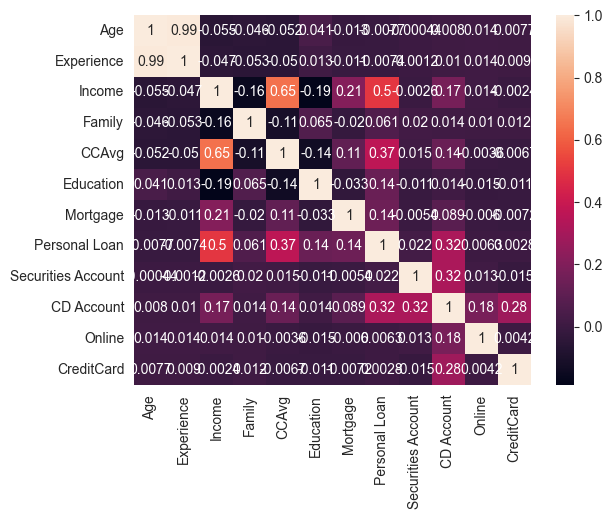

In [155]:
sns.heatmap(df_model.corr(), annot=True)

<Axes: ylabel='Income'>

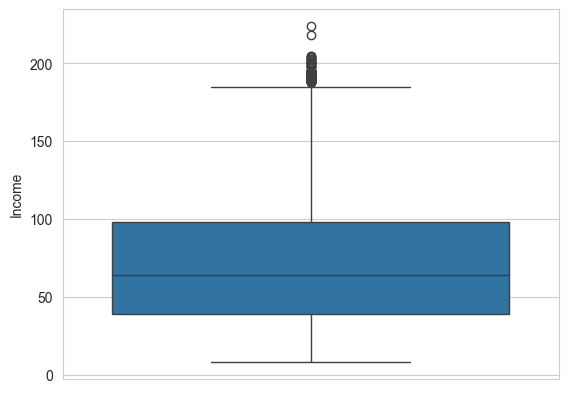

In [166]:
sns.boxplot(df["Income"])

<Axes: ylabel='CreditCard'>

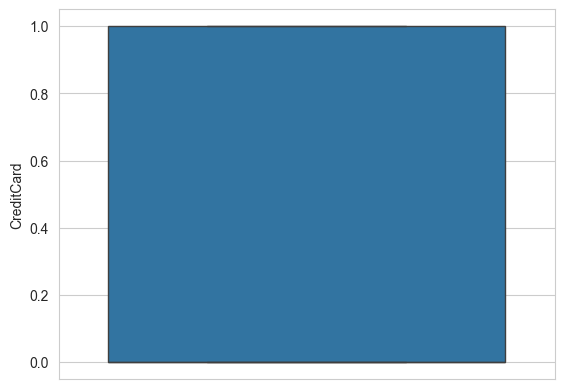

In [167]:
sns.boxplot(df["CreditCard"])

In [ ]:
sns.boxplot(df["Income"])